In [1]:
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
sns.set_style("darkgrid")

In [2]:
# Open json file as a dictionary
with open('logins.json', 'r') as json_file:
    json_data = json.load(json_file)
type(json_data)    

dict

### Part 1 ‑ Exploratory data analysis
#### The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [3]:
# Read json data as a dataframe:
df = pd.read_json('logins.json')
df.columns

Index(['login_time'], dtype='object')

In [4]:
type(df['login_time'][0])

pandas._libs.tslib.Timestamp

In [5]:
df['login_time'] = pd.to_datetime(df['login_time'])

In [6]:
type(df['login_time'][0])
df.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [7]:
# Set login_time column as index
df.set_index('login_time', inplace=True)
# Add a new column, value, with 1
df['value'] = 1

In [8]:
df.head()

value
login_time                
1970-01-01 20:13:18      1
1970-01-01 20:16:10      1
1970-01-01 20:16:37      1
1970-01-01 20:16:36      1
1970-01-01 20:26:21      1

In [9]:
min15_count = df.value.resample('15min').sum()

In [10]:
type(min15_count)

pandas.core.series.Series

In [11]:
def plot_df(DF, x_label, y_label, axis, title):
    fig, ax = plt.subplots()
    #plt.subplot(axis)
    plt.plot(DF)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    plt.title(title)

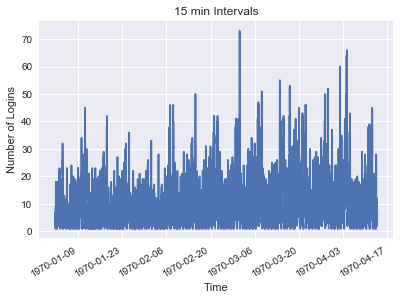

In [12]:
plot_df(min15_count, 'Time', 'Number of Logins', 221, '15 min Intervals')

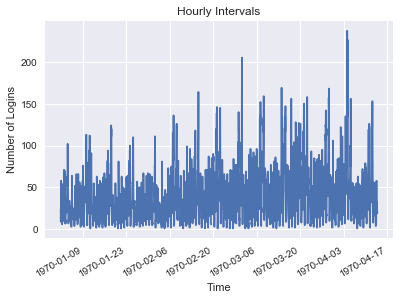

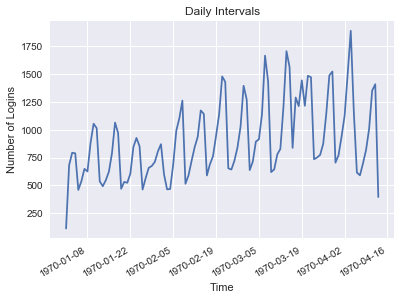

In [13]:
hourly_count = df.value.resample('H').sum()
plot_df(hourly_count, 'Time', 'Number of Logins', 222, 'Hourly Intervals')
daily_count = df.value.resample('D').sum()
plot_df(daily_count, 'Time', 'Number of Logins', 223, 'Daily Intervals')

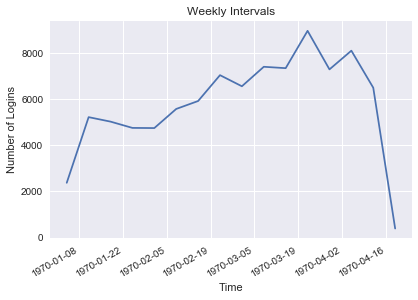

In [14]:
weekly_count = df.value.resample('W').sum()
plot_df(weekly_count, 'Time', 'Number of Logins', 224, 'Weekly Intervals')

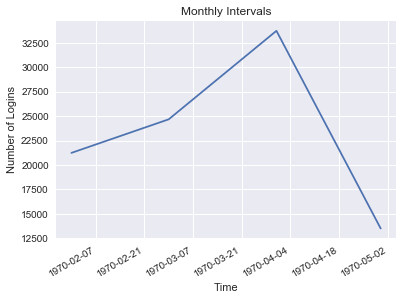

In [15]:
monthly_count = df.value.resample('M').sum()
plot_df(monthly_count, 'Time', 'Number of Logins', 224, 'Monthly Intervals')

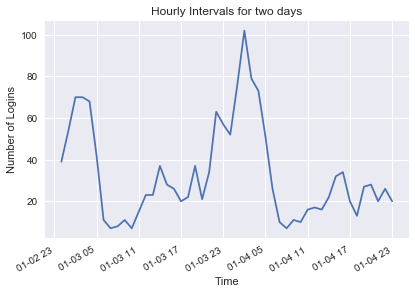

In [16]:
plot_df(hourly_count['1970-01-03':'1970-01-04'], 'Time', 'Number of Logins', 222, 'Hourly Intervals for two days')

#### The number of logins jumps at around 3 or 4 everyday and decreases after about 7 o'clock. 
#### Logins trend is increasung from January to April and drops after month of April.

### Part 2 ‑ Experiment and metrics design
#### The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
#### However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
#### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? 
#### We can measure the change in login times. If there is a considerable change in each city due to the change in drivers location, we can conclude that the drivers tends to stay in both cities more than before.
#### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: 
#### a. how you will implement the experiment:
#### b. what statistical test(s) you will conduct to verify the significance of the observation
#### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
#### We can perform a statistical analysis. We can assume that there is no change in the login times compared to the past in each city and all the change that we see in the statistical data is random and then calculate the p-value. If p-value is higher than 0.05, then we will reject the null hypothesis and can conclude that there is an actual change and the policy was effective. 
#### We measure the average active hours on the population before the toll reimbursment. 
#### Null hypothesis: The active hours did not change after the reimbursment and it is still same as what it used to be before.
#### Alternative hypothesis: The population active login hours is not same as what is used to be.
#### We can use z test for this. We calculate the mean and standard deviation of the population before any changes. Then using the new sample, we measure its mean value. Calculate z value. If z value is greater than Z corresponding to 97.5% or less than -Z (within our confidence interval), then p value is less than 0.05, and we can reject the null hypothesis and accept the alternative hypothesis. This means the new policy had an affect in the drivers commute.  

### Part 3 ‐ Predictive modeling
#### Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
#### We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
#### The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
#### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
#### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
#### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).
#### Data description
#### ● city: city this user signed up in
#### ● phone: primary device for this user
#### ● signup_date: date of account registration; in the form ‘YYYYMMDD’
#### ● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
#### ● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
#### ● avg_rating_by_driver: the rider’s average rating over all of their trips
#### ● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
#### ● surge_pct: the percent of trips taken with surge multiplier > 1
#### ● avg_surge: The average surge multiplier over all of this user’s trips
#### ● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
#### ● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
#### ● weekday_pct: the percent of the user’s trips occurring during a weekday

In [17]:
# Open json file as a dictionary
with open('ultimate_data_challenge.json', 'r') as json_file2:
    json_data2 = json.load(json_file2)
type(json_data2)   

list

In [18]:
print(json_data2[3])

{'city': "King's Landing", 'trips_in_first_30_days': 9, 'signup_date': '2014-01-10', 'avg_rating_of_driver': 4.6, 'avg_surge': 1.14, 'last_trip_date': '2014-06-29', 'phone': 'iPhone', 'surge_pct': 20.0, 'ultimate_black_user': True, 'weekday_pct': 80.0, 'avg_dist': 2.36, 'avg_rating_by_driver': 4.9}


In [19]:
df2 = pd.DataFrame(json_data2)
type(df2)

pandas.core.frame.DataFrame

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [21]:
# Conver two columns of "last_trip_date" and "signup_date" to datetime:
df2.last_trip_date = pd.to_datetime(df2.last_trip_date)
df2.signup_date = pd.to_datetime(df2.signup_date)

In [22]:
# Add "retained" column to the data:
date_data_pulled = df2.last_trip_date.max()
last_30_days = [date_data_pulled - datetime.timedelta(days=x) for x in range(0,30)]
df2['retained'] = df2.last_trip_date.map(lambda x: x in last_30_days)
df2.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  retained  
0                       4                 True         46.2      True  
1                       0                False         50.0     False  
2                       3                False        100.0     False  
3                       9                 True         80.0      True  
4                      14                False         82.4     False

In [23]:
fraction_retained = sum(df2.retained)/df2.retained.count()*100
print("Percentage of Users Retained: ", fraction_retained)

Percentage of Users Retained:  36.62


In [24]:
# Data Cleaning
df2.phone.fillna("iPhone", inplace = True)
df2.avg_rating_by_driver.fillna(df2.avg_rating_by_driver.mean(), inplace=True)
df2.avg_rating_of_driver.fillna(df2.avg_rating_of_driver.mean(), inplace=True)

In [25]:
# Check the names of cities
df2.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [26]:
# Replace city names by numbers, 1, 2 and 3
df2.city = df2.city.map({"King's Landing":1, 'Astapor':2, 'Winterfell':3})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110134b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f721e48>]], dtype=object)

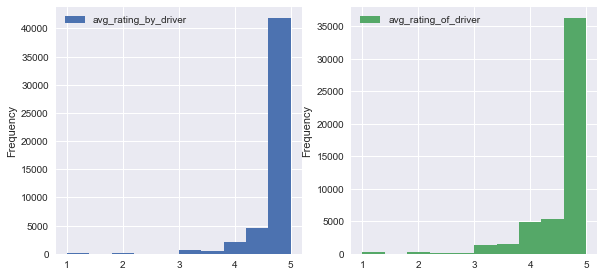

In [27]:
df2[['avg_rating_by_driver', 'avg_rating_of_driver']].\
plot(kind = 'hist', layout=(2,3), legend=True, subplots=True, figsize=(15,10))

Number of retained: 18310
Number of non retained: 31690


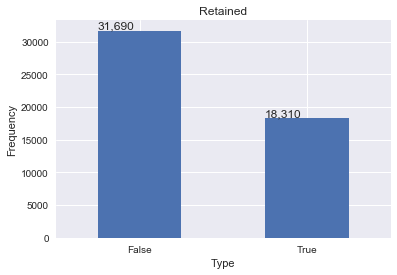

In [28]:
count_retained = df2['retained'].value_counts()
print('Number of retained:', count_retained[1])
print('Number of non retained:', count_retained[0])
ax = count_retained.plot(kind = 'bar', rot=0)
plt.title("Retained")
plt.xlabel("Type")
plt.ylabel("Frequency")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

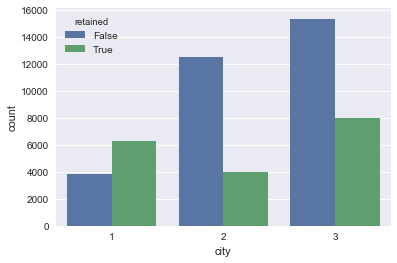

In [29]:
# Plot the effect of city on retained number
ax = sns.countplot(x='city', data=df2, hue='retained')

#### City plays a role in retained ratio. In city 1, there are more retained people than the ones who did not retain, which is in contrast with cities 2 and 3.

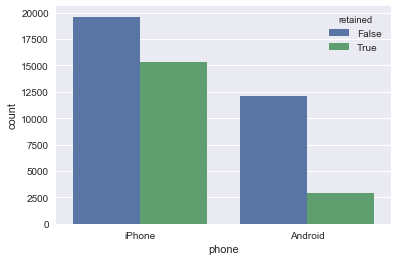

In [30]:
# Plot the effect of phone on retained number
sns.countplot(data=df2, x='phone', hue='retained')

#### Phone type has an effect on the retained rate. 

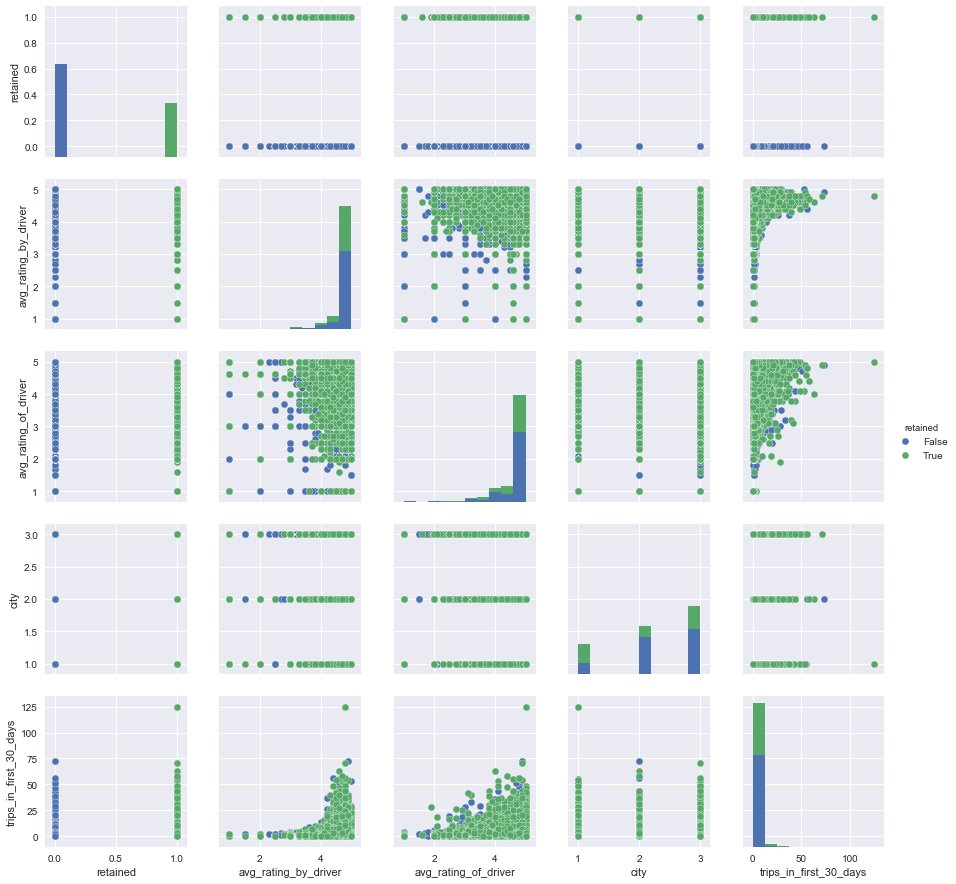

In [31]:
sns.pairplot(df2[['retained', 'avg_rating_by_driver', 'avg_rating_of_driver', 'city', 'phone', 'trips_in_first_30_days']], hue='retained')

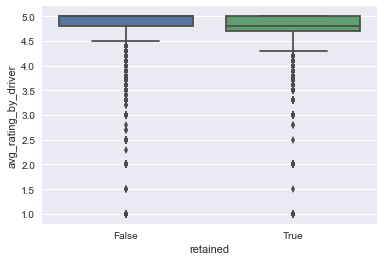

In [32]:
ax = sns.boxplot(x = 'retained', y = 'avg_rating_by_driver', data = df2)

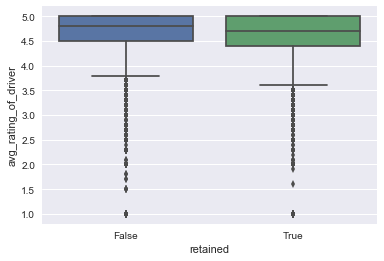

In [33]:
ax = sns.boxplot(x = 'retained', y = 'avg_rating_of_driver', data = df2)

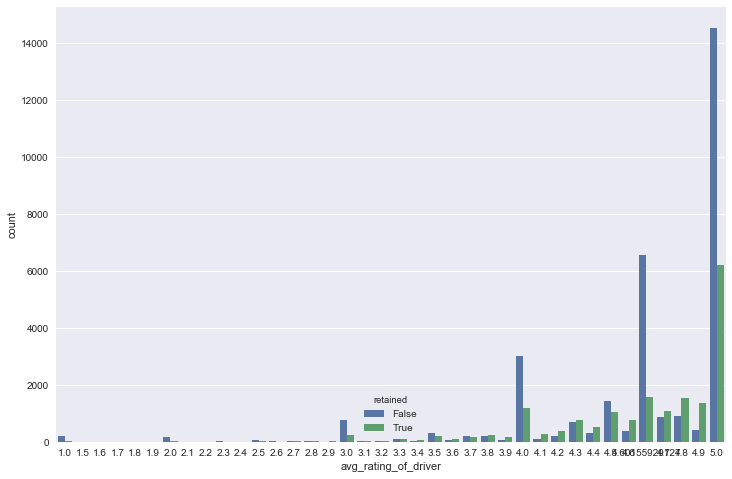

In [34]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'avg_rating_of_driver', hue='retained', data = df2)

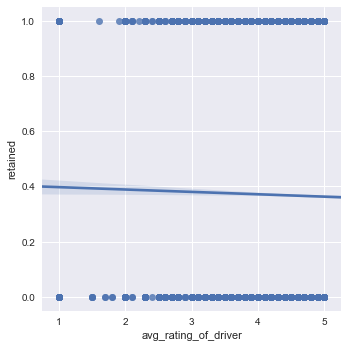

In [35]:
plt.figure(figsize=(12,8))
ax = sns.lmplot(x='avg_rating_of_driver', y='retained', data = df2)

#### There is not a strong correlation between reianed number and "avg_rating_of_driver"

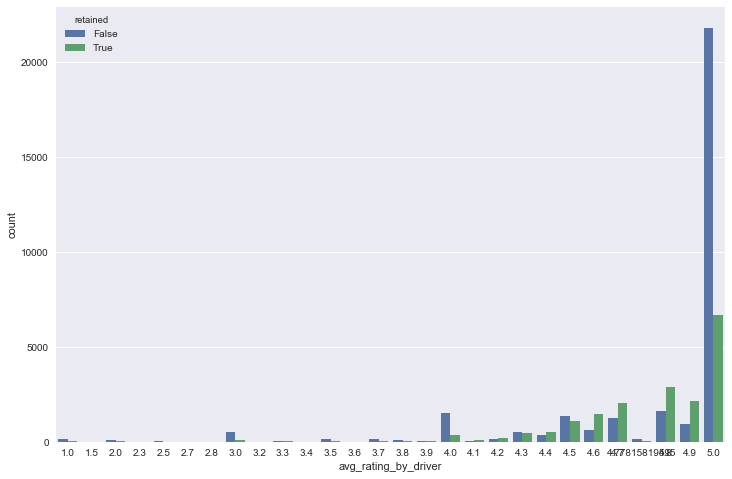

In [36]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'avg_rating_by_driver', hue='retained', data = df2)

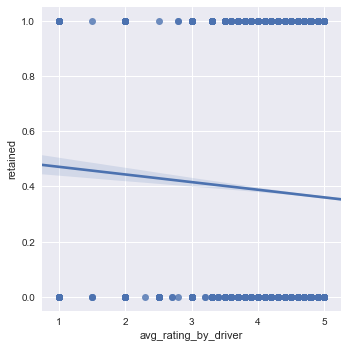

In [37]:
plt.figure(figsize=(12,8))
ax = sns.lmplot(x='avg_rating_by_driver', y='retained', data = df2)

#### Average rating of driver does not seem to have a significant effect on the retained rate. Average rating by driver has a higher effect. 

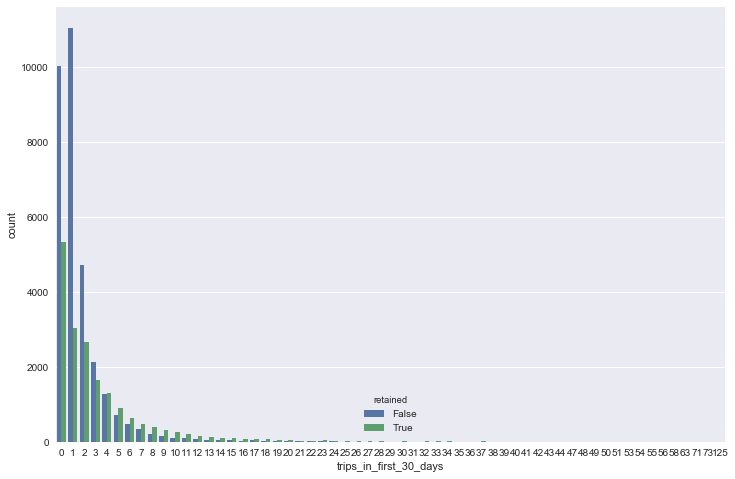

In [38]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'trips_in_first_30_days', hue='retained', data = df2)

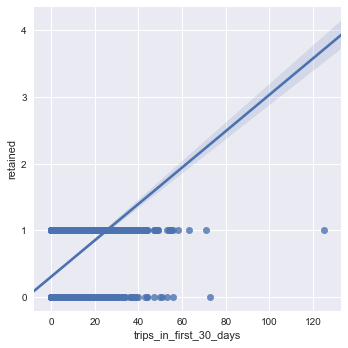

In [39]:
plt.figure(figsize=(12,8))
ax = sns.lmplot(x='trips_in_first_30_days', y='retained', data = df2)

#### People who had more number of trips in the first 30 days retained more.

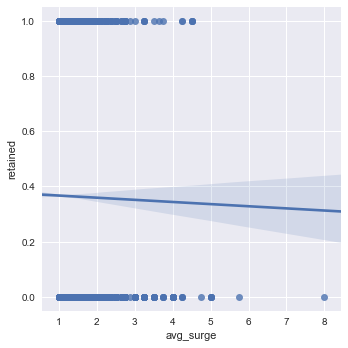

In [40]:
plt.figure(figsize=(12,8))
ax = sns.lmplot(x='avg_surge', y='retained', data = df2)

#### When surge used, there is more chance that customers did not retain. 

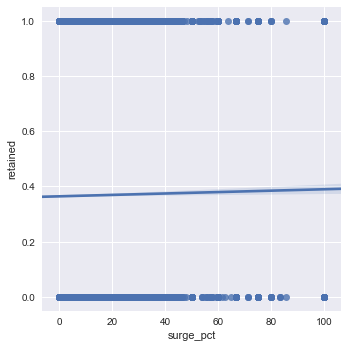

In [41]:
plt.figure(figsize=(12,8))
ax = sns.lmplot(x='surge_pct', y='retained', data = df2)

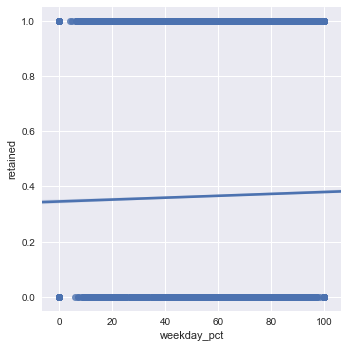

In [42]:
plt.figure(figsize=(12,8))
ax = sns.lmplot(x='weekday_pct', y='retained', data = df2)

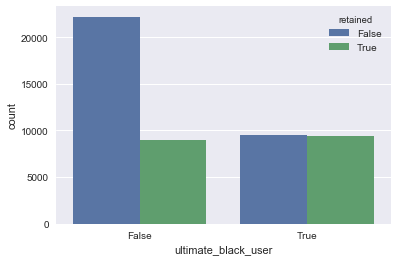

In [43]:
sns.countplot(data=df2, x='ultimate_black_user', hue = 'retained')

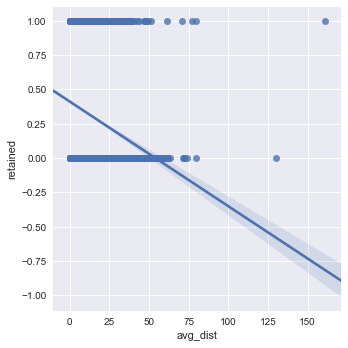

In [44]:
plt.figure(figsize=(12,8))
ax = sns.lmplot(x='avg_dist', y='retained', data = df2)

### Feature Engineering

In [47]:
# We can average 'avg_rating_by_driver' and 'avg_rating_of_driver' and define a new feature, 'avg_rating_driver'
df_clean = df2.copy()
df_clean['avg_rating_driver'] = df_clean[['avg_rating_by_driver', 'avg_rating_of_driver']].mean(axis=1)
df_clean.drop(['avg_rating_by_driver', 'avg_rating_of_driver', 'signup_date', 'last_trip_date'], inplace=True, axis=1)
df_clean.head()

avg_dist  avg_surge  city    phone  surge_pct  trips_in_first_30_days  \
0      3.67       1.10     1   iPhone       15.4                       4   
1      8.26       1.00     2  Android        0.0                       0   
2      0.77       1.00     2   iPhone        0.0                       3   
3      2.36       1.14     1   iPhone       20.0                       9   
4      3.13       1.19     3  Android       11.8                      14   

   ultimate_black_user  weekday_pct  retained  avg_rating_driver  
0                 True         46.2      True               4.85  
1                False         50.0     False               5.00  
2                False        100.0     False               4.65  
3                 True         80.0      True               4.75  
4                False         82.4     False               4.65

### Machine Learning

In [49]:
# We need to encode the categorical features as binary variables to use them in sklearn’s random forest classifier.
X_original = df_clean
X_original = pd.get_dummies(X_original)

In [51]:
X_original.head()

avg_dist  avg_surge  city  phone  surge_pct  trips_in_first_30_days  \
0      3.67       1.10     1      1       15.4                       4   
1      8.26       1.00     2      2        0.0                       0   
2      0.77       1.00     2      1        0.0                       3   
3      2.36       1.14     1      1       20.0                       9   
4      3.13       1.19     3      2       11.8                      14   

   ultimate_black_user  weekday_pct  retained  avg_rating_driver  
0                    1         46.2         1               4.85  
1                    0         50.0         0               5.00  
2                    0        100.0         0               4.65  
3                    1         80.0         1               4.75  
4                    0         82.4         0               4.65

In [55]:
# Split data into train and test:
from sklearn.model_selection import train_test_split
X = X_original.drop('retained', axis=1)
Y = X_original['retained']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=42)

#### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
clf_rf = RandomForestClassifier(random_state=12)
param_grid = { 
    'n_estimators': [20, 50, 100]
    #'max_features': ['auto', 'sqrt', 'log2'],
   # 'criterion' :['gini', 'entropy']
}

In [59]:
CV_rfc = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 50, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [62]:
CV_rfc.best_params_

{'n_estimators': 100}

In [63]:
CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [64]:
CV_rfc.best_score_

0.75751999999999997

In [66]:
clf_rf2 = CV_rfc.best_estimator_
clf_rf2.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [67]:
Y_pred = clf_rf2.predict(Xtest)
precision = precision_score(Ytest, Y_pred)
recall = recall_score(Ytest, Y_pred)
print("Precison score: ", precision)
print("Recall score: ", recall)
print(confusion_matrix(Ytest, Y_pred))
print(classification_report(Ytest, Y_pred))

Precison score:  0.998676373263
Recall score:  0.989291958042
[[7918    6]
 [  49 4527]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      7924
          1       1.00      0.99      0.99      4576

avg / total       1.00      1.00      1.00     12500



#### What are the most important features?

In [72]:
features_df = pd.DataFrame(clf_rf2.feature_importances_, index = X.columns)
features_df.sort_values(by=0,ascending=False)

0
avg_dist                0.323324
weekday_pct             0.147996
avg_rating_driver       0.121032
surge_pct               0.095553
trips_in_first_30_days  0.081746
avg_surge               0.081576
city                    0.076202
phone                   0.039309
ultimate_black_user     0.033262

#### Logistic Regression Classifier

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
C_param_range = [1E-8, 1E-7, 1E-5, 0.0001, 0.001, 0.01, 0.1, 1]
recall_best = 0
C_param_best = 0
for C_param in C_param_range:
    logreg = LogisticRegression(C = C_param, penalty = 'l1')
    cv_results = cross_val_score(logreg, X, Y, cv=5)
    print("C_param: ", C_param)
    print("Cross Validation Score: ", cv_results)
    logreg.fit(X, Y)
    y_pred = logreg.predict(Xtest)
    score_logreg = logreg.score(Xtest, Ytest)
    print("Logistic Regression Score: ", score_logreg)
    precision = precision_score(Ytest, y_pred)
    recall = recall_score(Ytest, y_pred)
    if recall > recall_best:
        recall_best = recall
        C_param_best = C_param
    print("Precison score: ", precision)
    print("Recall score: ", recall)
    print(confusion_matrix(Ytest, y_pred))
    print(classification_report(Ytest, y_pred))
    print("-------------------------------------")

C_param:  1e-08
Cross Validation Score:  [ 0.6338  0.6338  0.6338  0.6338  0.6338]
Logistic Regression Score:  0.63392
Precison score:  0.0
Recall score:  0.0
[[7924    0]
 [4576    0]]
             precision    recall  f1-score   support

          0       0.63      1.00      0.78      7924
          1       0.00      0.00      0.00      4576

avg / total       0.40      0.63      0.49     12500

-------------------------------------
C_param:  1e-07
Cross Validation Score:  [ 0.6338  0.6338  0.6338  0.6338  0.6338]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic Regression Score:  0.63392
Precison score:  0.0
Recall score:  0.0
[[7924    0]
 [4576    0]]
             precision    recall  f1-score   support

          0       0.63      1.00      0.78      7924
          1       0.00      0.00      0.00      4576

avg / total       0.40      0.63      0.49     12500

-------------------------------------
C_param:  1e-05
Cross Validation Score:  [ 0.6338  0.6338  0.6338  0.6338  0.6338]
Logistic Regression Score: 

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


 0.63392
Precison score:  0.0
Recall score:  0.0
[[7924    0]
 [4576    0]]
             precision    recall  f1-score   support

          0       0.63      1.00      0.78      7924
          1       0.00      0.00      0.00      4576

avg / total       0.40      0.63      0.49     12500

-------------------------------------


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


C_param:  0.0001
Cross Validation Score:  [ 0.6308  0.6315  0.6318  0.6302  0.6301]
Logistic Regression Score:  0.63512
Precison score:  0.518427518428
Recall score:  0.0461101398601
[[7728  196]
 [4365  211]]
             precision    recall  f1-score   support

          0       0.64      0.98      0.77      7924
          1       0.52      0.05      0.08      4576

avg / total       0.59      0.64      0.52     12500

-------------------------------------
C_param:  0.001
Cross Validation Score:  [ 0.6836  0.6873  0.683   0.6807  0.683 ]
Logistic Regression Score:  0.68568
Precison score:  0.712409717663
Recall score:  0.237106643357
[[7486  438]
 [3491 1085]]
             precision    recall  f1-score   support

          0       0.68      0.94      0.79      7924
          1       0.71      0.24      0.36      4576

avg / total       0.69      0.69      0.63     12500

-------------------------------------
C_param:  0.01
Cross Validation Score:  [ 0.7045  0.6985  0.697   0.7     0.

In [75]:
print("C_param_best: ", C_param_best)
logreg = LogisticRegression(C = C_param_best, penalty = 'l1')
logreg.fit(X, Y)
y_pred = logreg.predict(Xtest)
score_logreg = logreg.score(Xtest, Ytest)
print("Logistic Regression Score: ", score_logreg)

C_param_best:  1
Logistic Regression Score:  0.6972


In [77]:
precision = precision_score(Ytest, y_pred)
recall = recall_score(Ytest, y_pred)
print("Precison score: ", precision)
print("Recall score: ", recall)
print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

Precison score:  0.628785411918
Recall score:  0.421984265734
[[6784 1140]
 [2645 1931]]
             precision    recall  f1-score   support

          0       0.72      0.86      0.78      7924
          1       0.63      0.42      0.51      4576

avg / total       0.69      0.70      0.68     12500



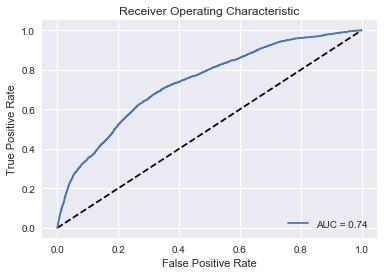

In [78]:
y_pred_prob = logreg.predict_proba(Xtest)[:,1]
fpr, tpr, threshold = roc_curve(Ytest, y_pred_prob)
roc_auc = auc(fpr,tpr)
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Both methods are giving almost same results, with models being about 70% accurate.
#### avg_dist, weekly_pct and avg_rating_driver are the most important factors in predicting the retention rate. So improving customer service can be helpful. Also targeting the short distance rides can help the retention.